In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#load the data
airbnb_data=pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:
# 1. Data Integrity Checks
print(airbnb_data.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [5]:
print(airbnb_data.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [6]:
# 2. Handling Missing Data
missing_data=airbnb_data.isnull().sum()
print (missing_data)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [7]:
# 3. Removing Duplicates
duplicates = airbnb_data.duplicated()
print(duplicates.sum())
airbnb_data = airbnb_data.drop_duplicates()

0


In [8]:
# 4.Standardization
airbnb_data['price'] = airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

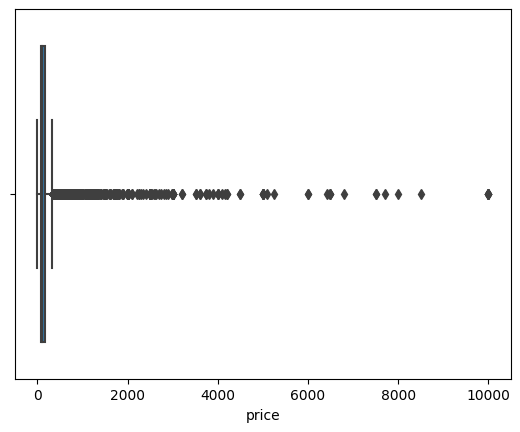

In [9]:
# 5.outlier detection and handling
sns.boxplot(x=airbnb_data['price'])
plt.show()


In [10]:
# z score method
z_scores = stats.zscore(airbnb_data['price'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
airbnb_data = airbnb_data[filtered_entries]


In [11]:
print(f"Number of outliers detected: {len(filtered_entries)}")

Number of outliers detected: 48895


In [12]:
#IQR method
Q1 = airbnb_data['price'].quantile(0.25)
Q3 = airbnb_data['price'].quantile(0.75)
IQR = Q3 - Q1
outliers  = airbnb_data[((airbnb_data['price'] < (Q1 - 1.5 * IQR)) | (airbnb_data['price'] > (Q3 + 1.5 * IQR)))]
filtered_data = airbnb_data[(airbnb_data['price'] >=(Q1 - 1.5 * IQR)) & (airbnb_data['price'] <= (Q3 + 1.5 * IQR))]

In [13]:
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 2584


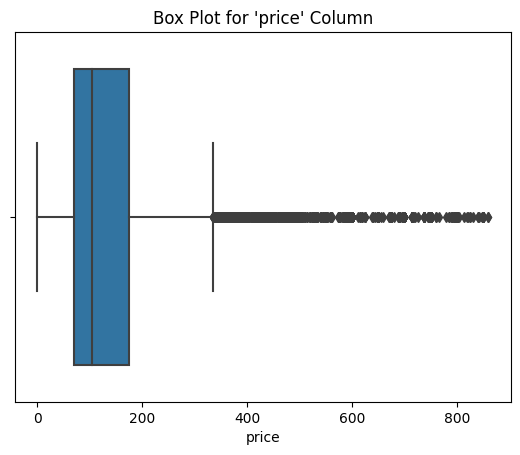

In [14]:
sns.boxplot(x=airbnb_data['price'])
plt.title("Box Plot for 'price' Column")
plt.show()